## Importing all the required libraries 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [55]:
heart = pd.read_csv("Datasets/dataset3.csv")
heart.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


## Exploring the dataset

In [56]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [57]:
heart_df = heart.copy()

In [58]:
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Checking null values 

In [59]:
heart_df.isnull().values.any()

np.False_

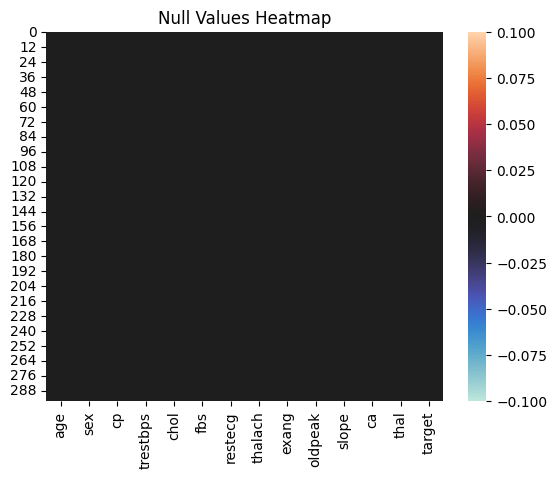

In [60]:
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

*Fortunately, there is no missing values present in the dataset.*

In [61]:
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

### Distribution of target variable

In [62]:
heart_df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [63]:
heart_df['target'].value_counts()/heart_df.shape[0]*100

target
0    53.872054
1    46.127946
Name: count, dtype: float64

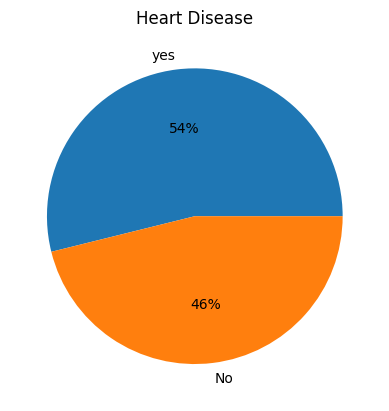

In [64]:
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

### Distribution of features 

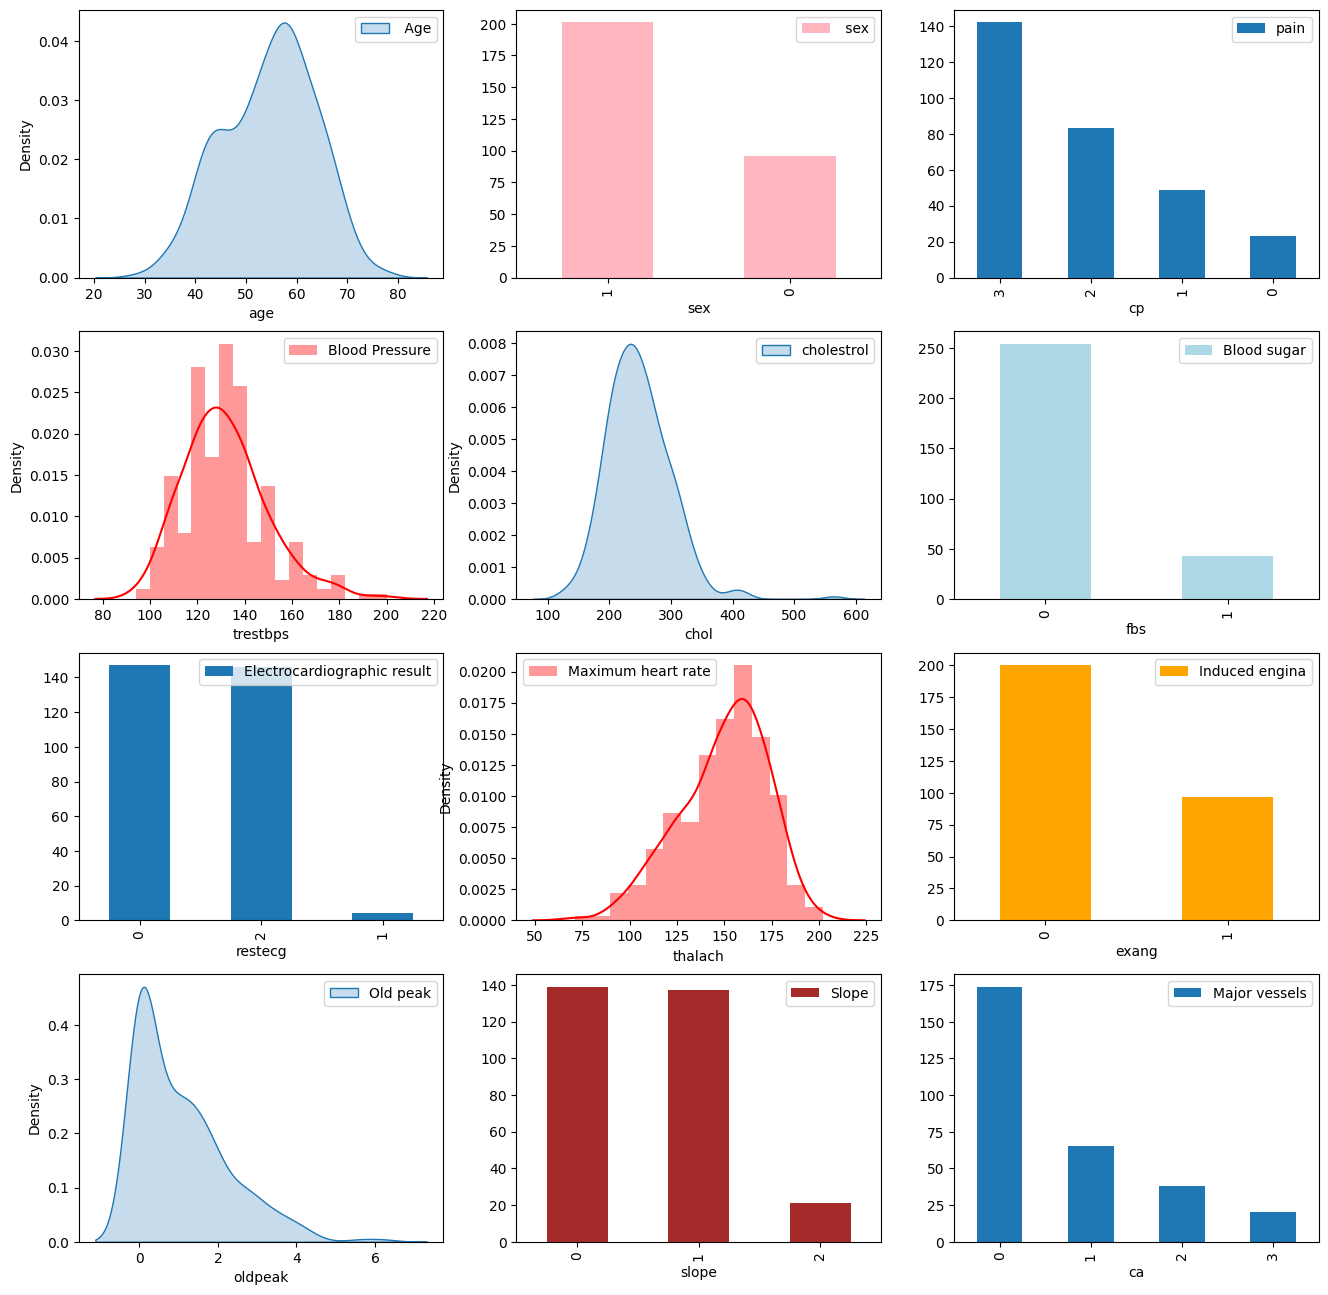

In [65]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['age'],shade=True,label=' Age')

plt.legend()
fig = plt.subplot(432)
heart_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')

plt.legend()
fig = plt.subplot(433)
heart_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')

plt.legend()
fig = plt.subplot(434)

sns.distplot(heart_df['trestbps'], color="red",  kde= True,label='Blood Pressure')

plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart_df['chol'],shade=True,label='cholestrol')

plt.legend()
fig = plt.subplot(436)
heart_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')

plt.legend()
fig = plt.subplot(437)
heart_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')

plt.legend()
fig = plt.subplot(438)

sns.distplot(heart_df['thalach'], color="red",  kde= True,label='Maximum heart rate')

plt.legend()
fig = plt.subplot(439)
heart_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')

plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')

plt.legend()
fig = plt.subplot(4,3,11)
heart_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')

plt.legend()
fig = plt.subplot(4,3,12)
heart_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')

plt.legend()
plt.show()

## Distribution of features w.r.t target

### Age distribution based on heart disease

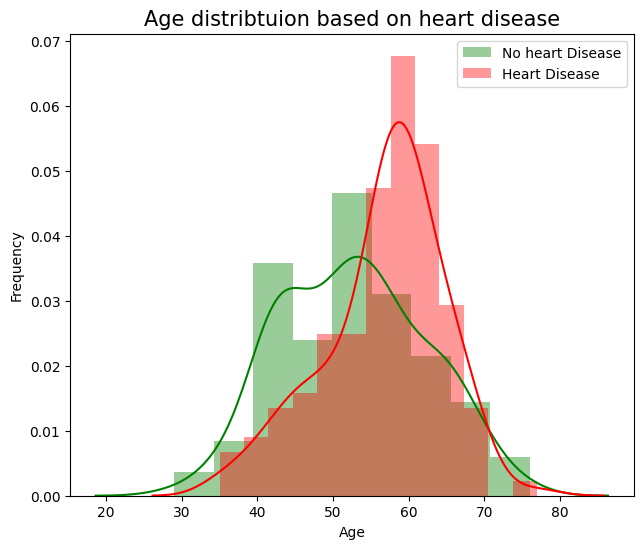

In [66]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()


In [67]:
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [68]:
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.75912408759124


### Heart disease frequency according to chest pain types

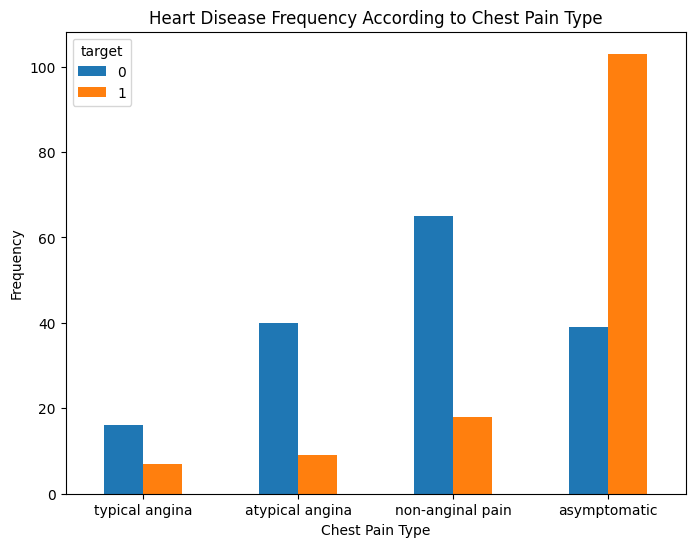

In [69]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Blood pressure distribution based on heart rate

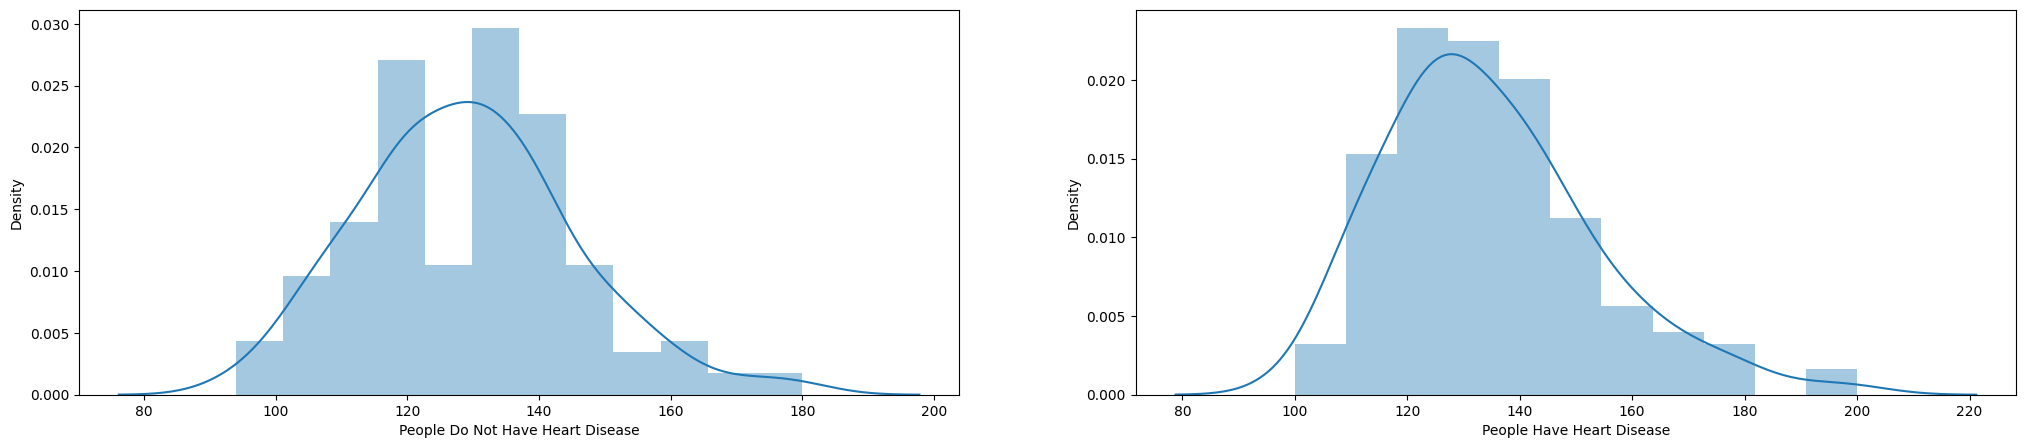

In [70]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [71]:
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.175


In [72]:
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.63503649635035


### Cholesterol distribution based on heart disease

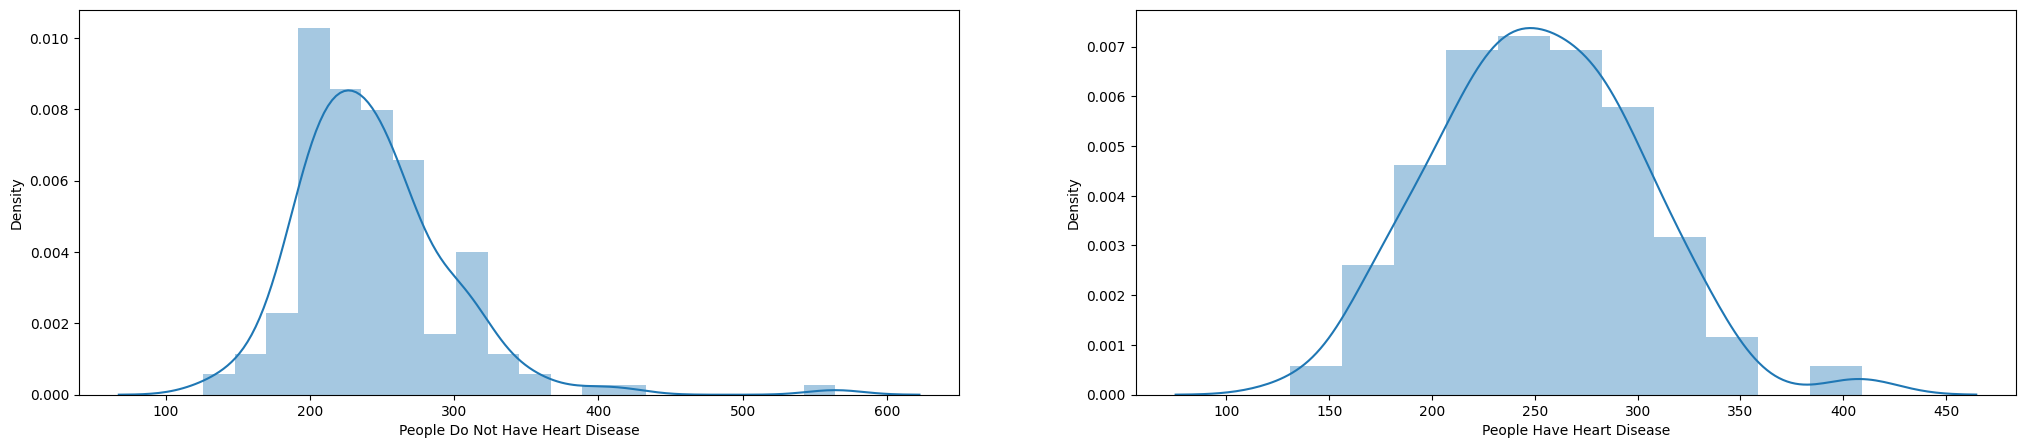

In [73]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [74]:
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  243.49375


In [75]:
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  131
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  251.85401459854015


### Heart Disease Frequency According to Fasting Blood Sugar

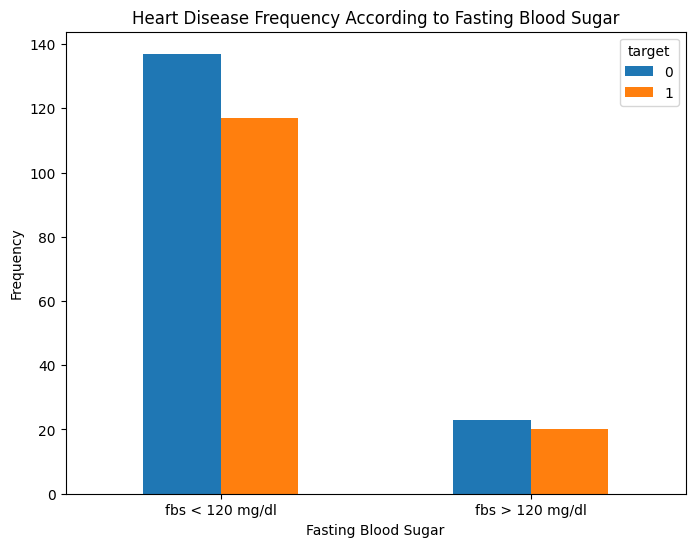

In [76]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency According to Resting Electrocardiographic Results

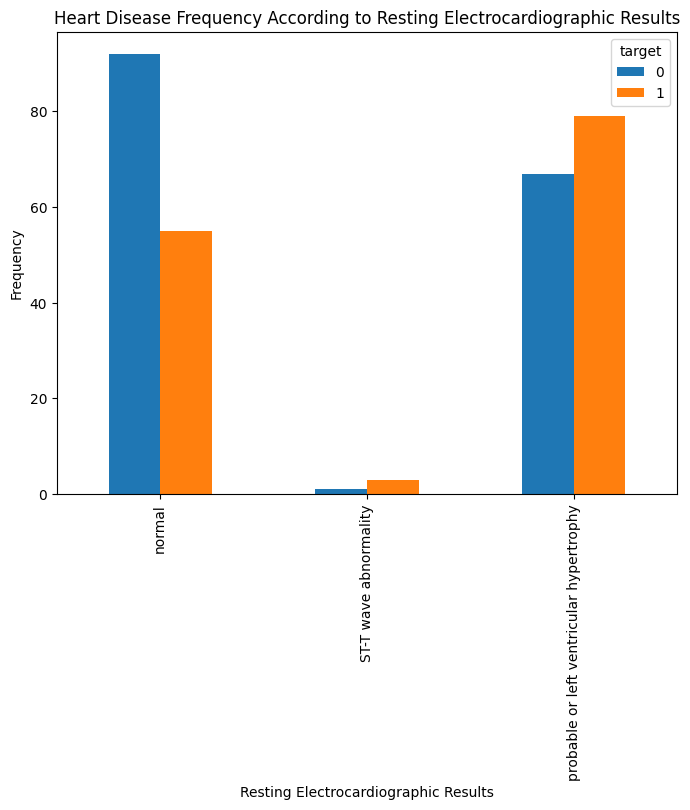

In [77]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


### Maximum heart rate distribution based on heart disease

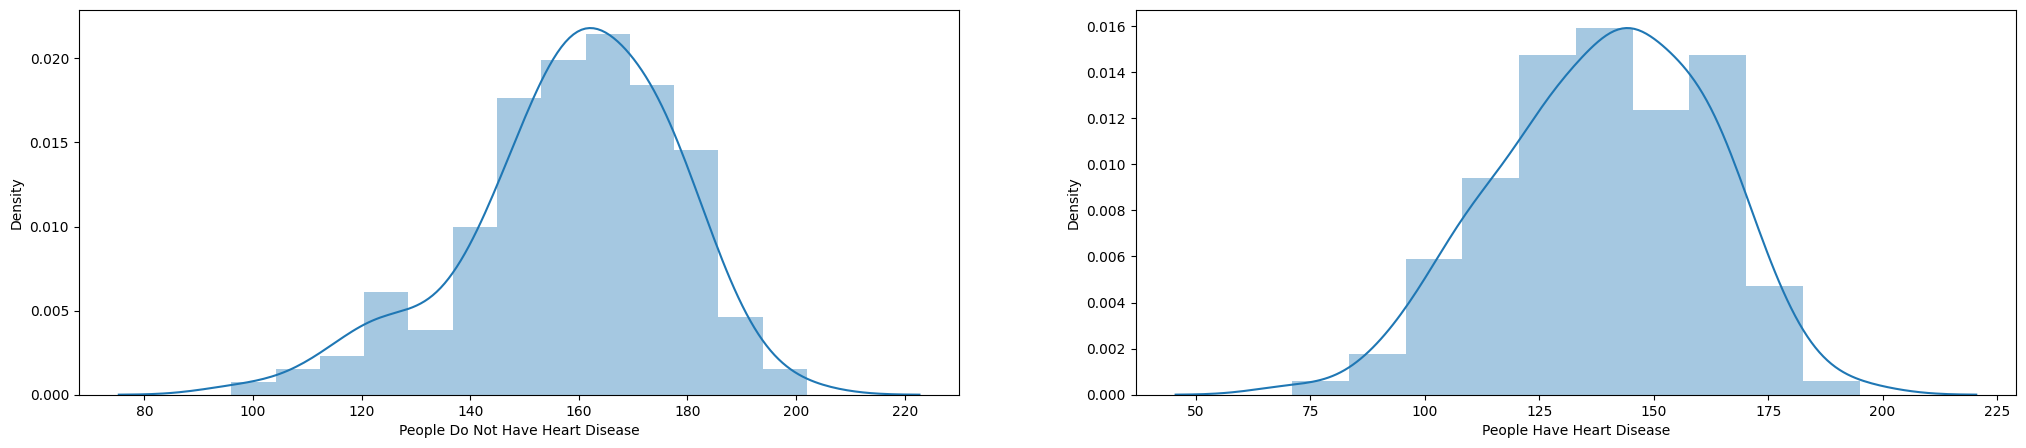

In [78]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

### ST depression distribution based on heart disease

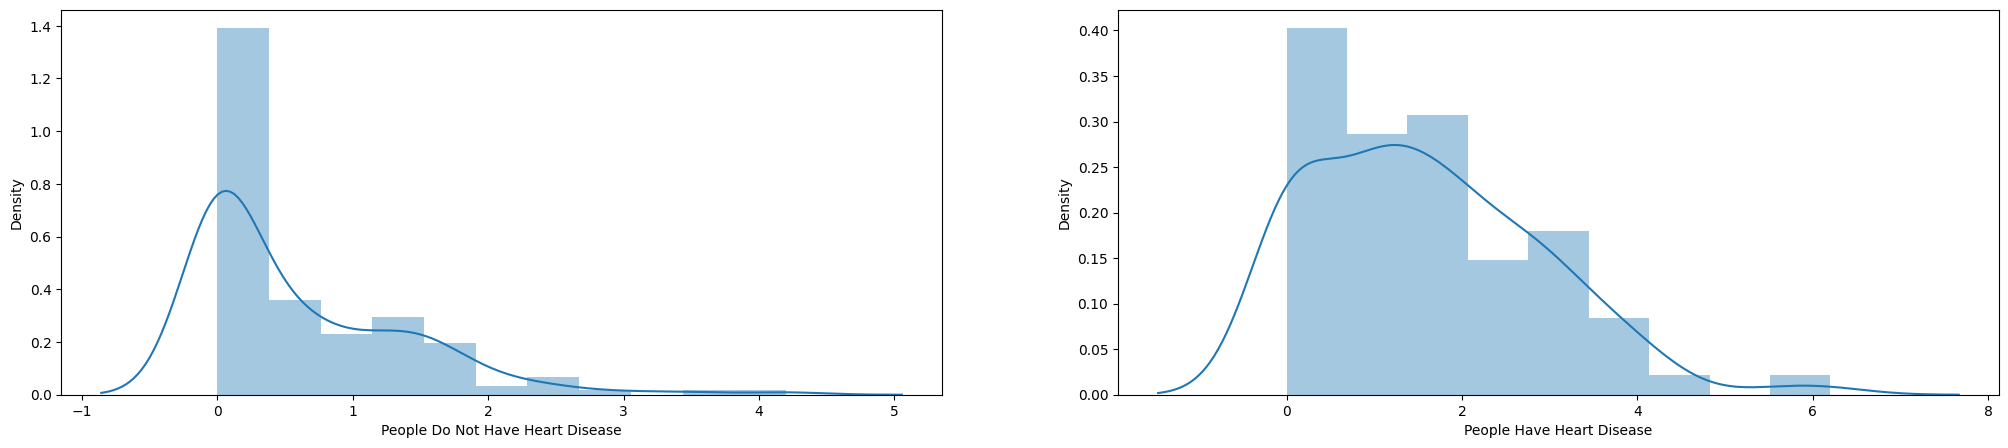

In [79]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [80]:
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.5987500000000001


In [81]:
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.5890510948905108


### Heart Disease Frequency According to Exercise Induced Angina

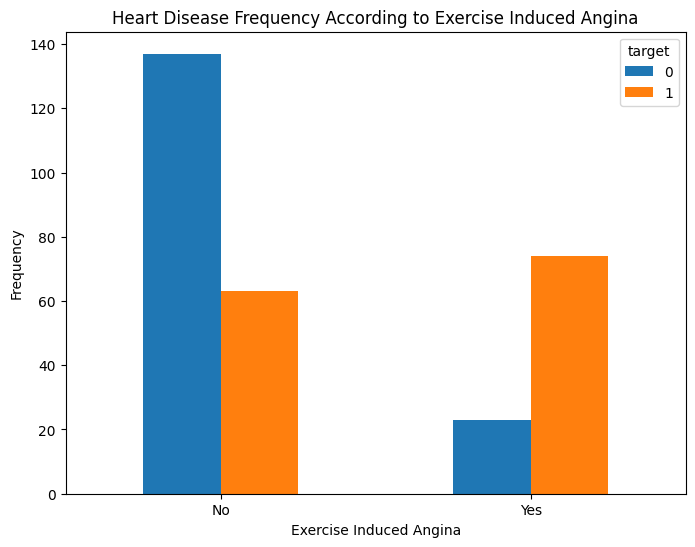

In [82]:
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Slope of the peak exercise ST segment based on the target

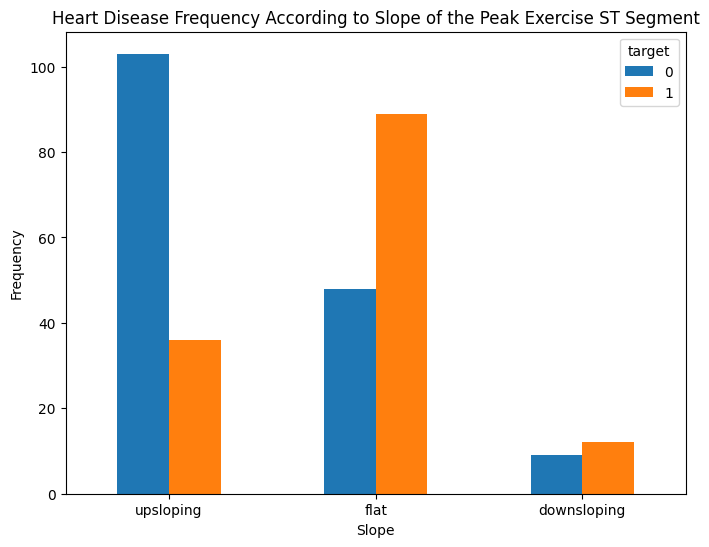

In [83]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Number of vessels based on the target

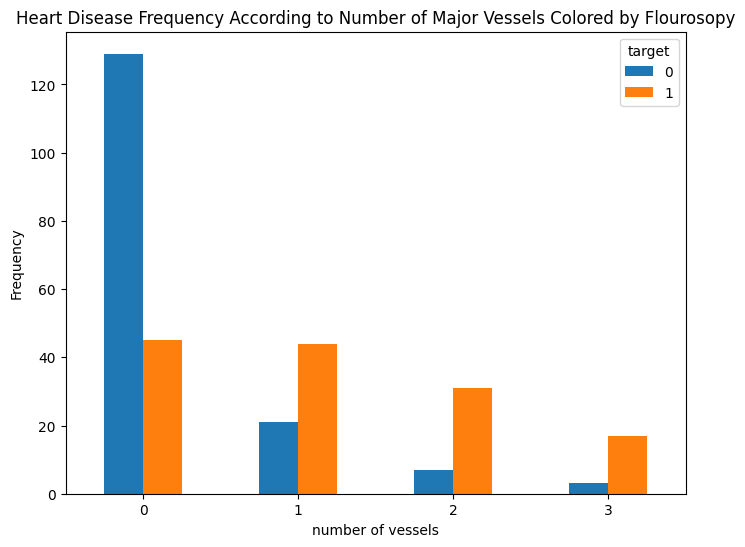

In [84]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency According to Thalassemia

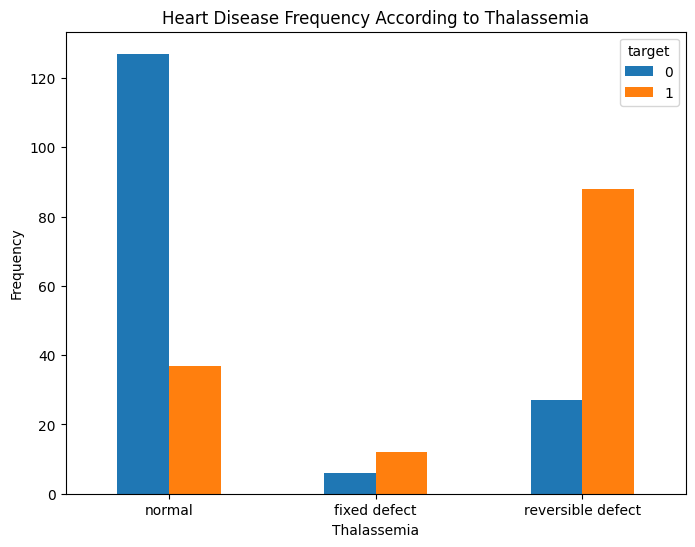

In [85]:
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*People with reversible defect are more likely to have heart disease.*

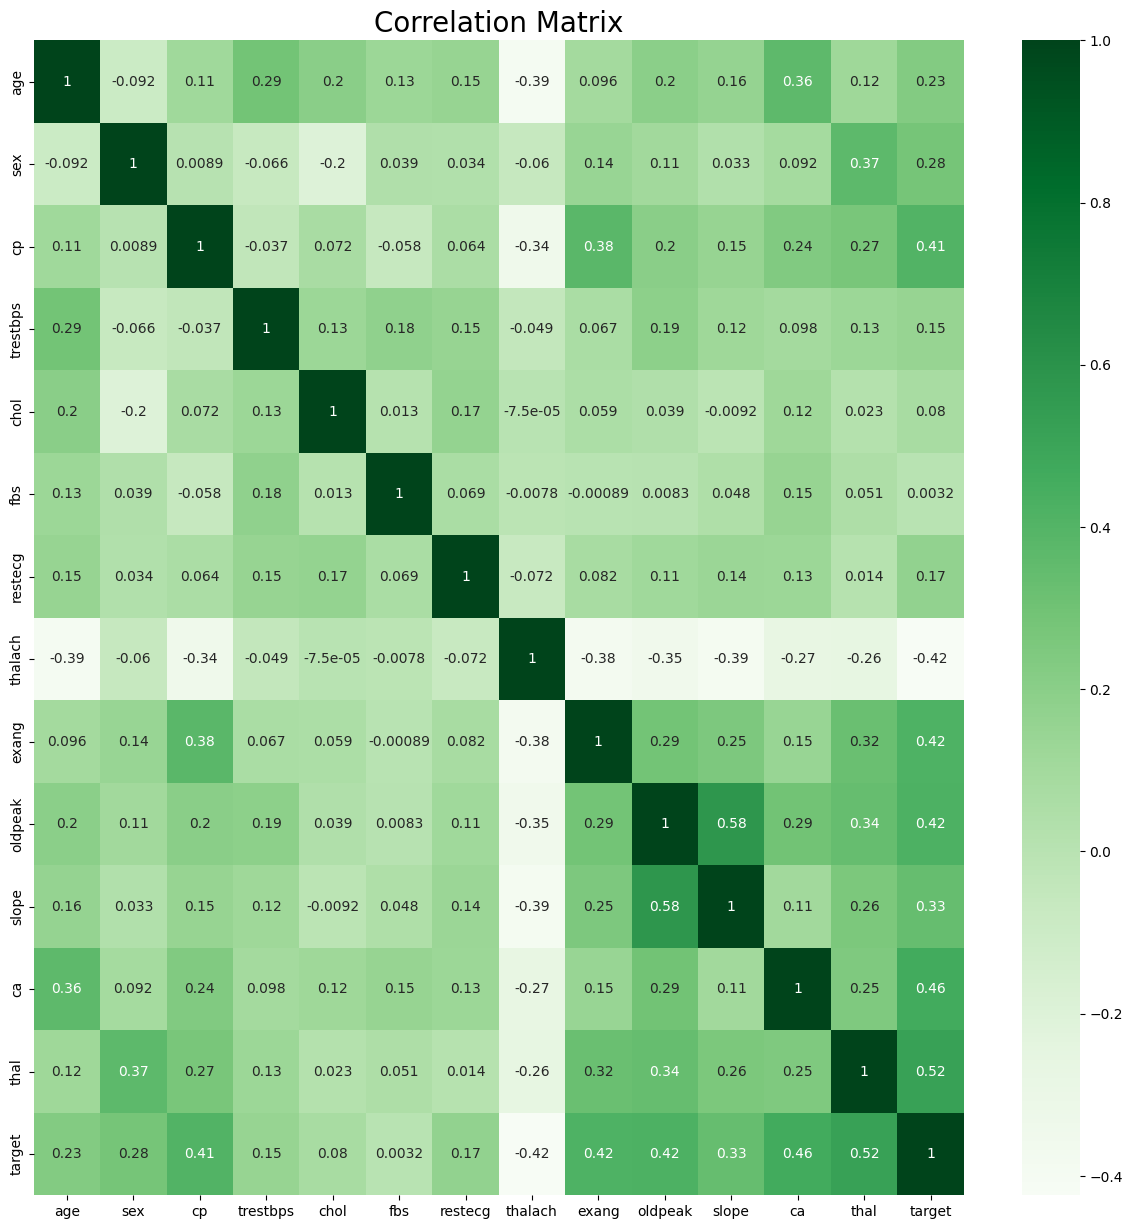

In [86]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

### Model building and traning 

In [87]:
x= heart_df.drop(columns= 'target')
y= heart_df.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (222, 13), X_test size: (75, 13)


In [88]:
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)


In [89]:
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.76

In [90]:
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.77      0.73      0.75        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75

Accuracy: 76.0%



In [91]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[30,  8],
       [10, 27]])

### K-nearest-neighbor classifier 

In [92]:
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.7466666666666667

In [93]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.75      0.73      0.74        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

Accuracy: 74.67%



In [94]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[29,  9],
       [10, 27]])

### Support Vector Classifier

In [95]:
SVC_model= SVC()
SVC_model.fit(x_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(x_test_scaler)
SVC_model.score(x_test_scaler,y_test)

0.7866666666666666

In [96]:
print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.78      0.78      0.78        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75

Accuracy: 78.67%



In [97]:
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[30,  8],
       [ 8, 29]])

### Random Forest Classifier

In [98]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.8

In [99]:
print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        38
           1       0.82      0.76      0.79        37

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75

Accuracy: 80.0%



In [100]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[32,  6],
       [ 9, 28]])

### Decison Tree Classifier

In [101]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)


0.72

In [102]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.69      0.78      0.73        37

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75

Accuracy: 72.0%



In [103]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[25, 13],
       [ 8, 29]])